## Data visualisation respirometer

In [8]:
%matplotlib inline

In [9]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from matplotlib.ticker import LinearLocator, MaxNLocator
sns.set_style('whitegrid')

In [10]:
mpl.rcParams['font.size'] = 16
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16 

## Example data Cierkens

In [12]:
observations = pd.read_csv("./bayesian_story/respirometer_data.txt", sep="\t", index_col=0, 
                           names=["DO", "OURex"], skiprows=2)
observations.index = observations.index/(60*24)  #everything to days
observations.index.name='Time (min)'

In [13]:
observations.head()

,DO,OURex
Time (min),,
0.000000,8.488234,0.006513
0.000010,8.488691,0.022208
0.000022,8.493058,0.037903
0.000035,8.495394,0.053598
0.000046,8.492392,0.069293


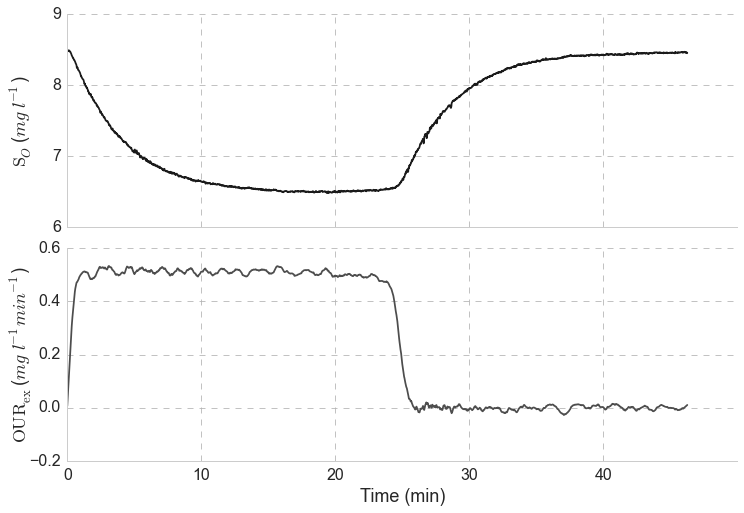

In [14]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
fig.subplots_adjust(hspace=0.1)
axs[0].plot(observations.index*24*60, observations['DO'],'-', color ='0.1')
axs[0].set_yticks([6., 7., 8., 9.])
axs[0].set_ylabel('$\mathrm{S}_{O}$ ($mg\ l^{-1}$)')

axs[1].plot(observations.index*24*60, observations['OURex'],'-', color ='0.3')
axs[1].set_yticks([-0.2, 0., .2, .4, .6])
axs[1].set_xticks([0, 10, 20, 30, 40])
axs[1].set_ylabel('$\mathrm{OUR}_{\mathrm{ex}}$ ($mg\ l^{-1} min^{-1}$)')
axs[1].set_xlabel('Time (min)')

labelx = -0.05
for ax in axs:
    #ax.yaxis.set_major_locator(MaxNLocator(5))
    ax.yaxis.set_label_coords(labelx, 0.5)
    #remove spines
    #ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # set grid
    ax.grid(which='major', axis='both', color='0.7',
                 linestyle='--', linewidth=0.8)     
plt.savefig('respiro_data1.png', dpi=300)    
plt.savefig('respiro_data1.pdf', dpi=300)    

## Example DATA DECUBBER

In [18]:
cubber_ref = pd.read_csv("./thesis_decubber/0508Aall_pieken.csv")[['NewTime','DO', 'OUR filt']]
cubber_ref = cubber_ref.set_index('NewTime')

In [19]:
cubber_ref.head()

,DO,OUR filt
NewTime,,
0.00000,8.957035,1.148215
1.00005,8.954335,1.133313
2.00011,8.950806,1.166666
2.99917,8.945957,1.261050
3.99923,8.939847,1.365232


In [20]:
ac_dosing = np.array([17.25, 34.5, 8.625, 4.3125, 69])
ac_moments = np.array([0., 1540, 3650, 5510, 7775])
shots = pd.DataFrame({'dosing': ac_dosing, 'moment': ac_moments})
shots = shots.set_index('moment')

In [21]:
ac_dosing*2

array([  34.5  ,   69.   ,   17.25 ,    8.625,  138.   ])

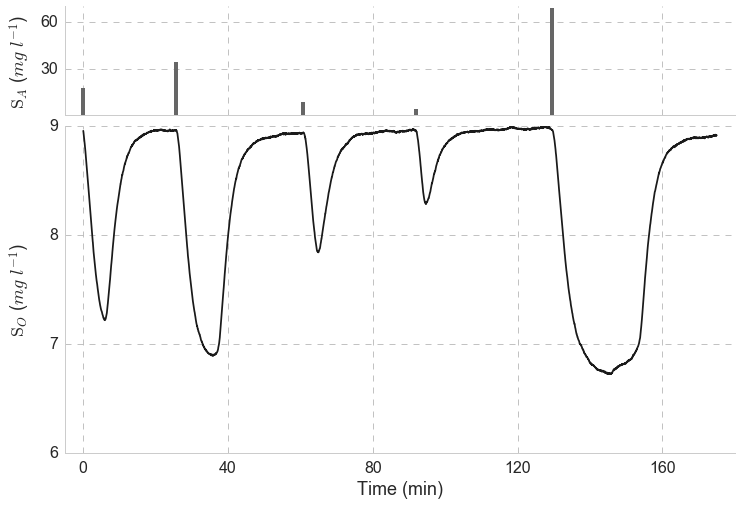

In [140]:
import matplotlib.gridspec as gridspec
#fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

fig = plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 3], hspace=0.05)

ax2 = plt.subplot(gs[0])
ax2.vlines(ac_moments/60., [0.]*5, ac_dosing, linewidth=4, colors='0.4')
ax2.set_xticks([0., 40, 80, 120, 160])
ax2.set_yticks([30, 60])
ax2.set_ylabel('$\mathrm{S}_{A}$ ($mg\ l^{-1}$)')

ax1 = plt.subplot(gs[1], sharex=ax2)
fig.subplots_adjust(hspace=0.1)
ax1.plot(cubber_ref.index/60., cubber_ref['DO'],'-', color ='0.1')
ax1.set_yticks([6., 7., 8., 9.])
ax1.set_ylabel('$\mathrm{S}_{O}$ ($mg\ l^{-1}$)')
ax1.set_xlim([-5, 180])
ax1.set_xlabel('Time (min)')
#ax1.set_xlim([-50., 11000])

#axs[1].plot(cubber_ref.index/60, cubber_ref['OUR filt'],'-', color ='0.3')
#axs[1].set_yticks([-3, 0., 3])
#axs[1].set_xticks([0, 40, 80, 120, 160])
#axs[1].set_ylabel('$\mathrm{OUR}_{\mathrm{ex}}$ ($mg\ l^{-1} min^{-1}$)')
#axs[1].set_xlabel('Time (min)')

labelx = -0.05
for ax in [ax1, ax2]:
    #ax.yaxis.set_major_locator(MaxNLocator(5))
    ax.yaxis.set_label_coords(labelx, 0.5)
    #remove spines
    #ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # set grid
    ax.grid(which='major', axis='both', color='0.7',
                 linestyle='--', linewidth=0.8)  
plt.setp(ax2.get_xticklabels(), visible=False)    
plt.savefig('respiro_data2.png', dpi=300)    
plt.savefig('respiro_data2.pdf', dpi=300)    